### Student Information
Name:王昱晨

Student ID:114062541

GitHub ID:easonwang220-art

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [11]:
### Begin Assignment Here
import os,re, warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
RANDOM_STATE = 1
np.random.seed(RANDOM_STATE)
DATA_PATH = "./newdataset/Reddit-stock-sentiment.csv"  # dataset location
assert os.path.exists(DATA_PATH), f"Dataset not found at {DATA_PATH}"

In [12]:
df = pd.read_csv(DATA_PATH)
df.head(3)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0


In [13]:
print("Missing per column:\n", df.isnull().sum())
print("\nDuplicated rows:", df.duplicated().sum())

Missing per column:
 type              0
datetime          0
post_id           0
subreddit         0
title             0
author            0
url               0
upvotes           0
downvotes       783
upvote_ratio    783
text              0
subjectivity      0
polarity          0
sentiment         0
entities          0
label             0
dtype: int64

Duplicated rows: 0


In [14]:
df = df.drop(columns=["downvotes", "upvote_ratio"], errors="ignore")

In [15]:
print("Missing per column:\n", df.isnull().sum())
print("\nDuplicated rows:", df.duplicated().sum())

Missing per column:
 type            0
datetime        0
post_id         0
subreddit       0
title           0
author          0
url             0
upvotes         0
text            0
subjectivity    0
polarity        0
sentiment       0
entities        0
label           0
dtype: int64

Duplicated rows: 0


In [16]:
def basic_clean(s: str) -> str:
    if not isinstance(s, str):
        return ""
    s = s.lower()
    s = re.sub(r"\s+", " ", s).strip()
    return s

df["text_clean"] = df["text"].apply(basic_clean)
df["n_chars"] = df["text_clean"].str.len()
df["n_words"] = df["text_clean"].str.split().map(len)

df[["text_clean","n_chars","n_words"]].head(3)

,text_clean,n_chars,n_words
0,calls on retards,16,3
1,stunt as in like why did they even make a big ...,137,27
2,seeing lots of red in the ticker.,33,7


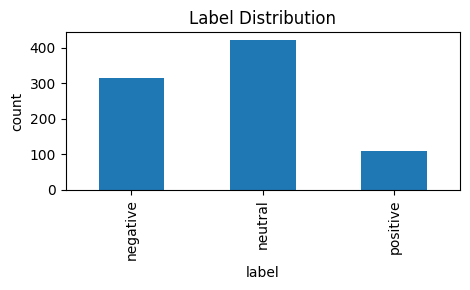

In [17]:
lab_map = {-1.0:"negative", 0.0:"neutral", 1.0:"positive"}
ax = (df["label"].map(lab_map)
      .value_counts()
      .reindex(["negative","neutral","positive"])
      .plot(kind="bar", figsize=(4.8,3.0), title="Label Distribution"))
ax.set_xlabel("label"); ax.set_ylabel("count")
plt.tight_layout(); plt.show()

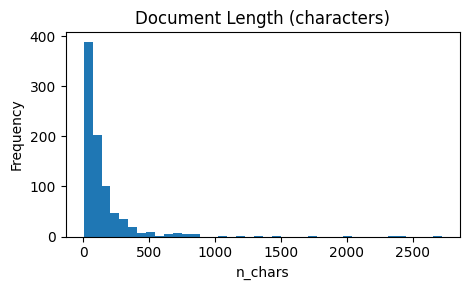

In [18]:
plt.figure(figsize=(4.8,3.0))
df["n_chars"].plot(kind="hist", bins=40, title="Document Length (characters)")
plt.xlabel("n_chars")
plt.tight_layout(); plt.show()


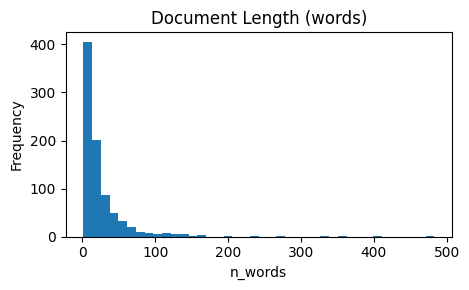

In [19]:
plt.figure(figsize=(4.8,3.0))
df["n_words"].plot(kind="hist", bins=40, title="Document Length (words)")
plt.xlabel("n_words")
plt.tight_layout(); plt.show()

In [20]:
n = 300  
df_s = df.sample(n=n, random_state=RANDOM_STATE).sort_index().reset_index(drop=True)
print("Sampled shape:", df_s.shape)
df_s.head(2)


Sampled shape: (300, 17)


,type,datetime,post_id,subreddit,title,author,url,upvotes,text,subjectivity,polarity,sentiment,entities,label,text_clean,n_chars,n_words
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,Calls on retards,1.00000,-0.900000,-1.0,[],-1.0,calls on retards,16,3
1,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,Vision Marine Technologies Inc. is rewriting t...,0.64697,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0,vision marine technologies inc. is rewriting t...,1061,159


In [21]:
bow = CountVectorizer(min_df=5, max_df=0.9)
X_counts = bow.fit_transform(df_s["text_clean"])
vocab = bow.get_feature_names_out()

print("DTM shape:", X_counts.shape)
print("vocab size:", len(vocab))
print("sample terms:", vocab[:10])

DTM shape: (300, 240)
vocab size: 240
sample terms: ['10' '30' 'about' 'actually' 'after' 'again' 'ago' 'all' 'already' 'also']


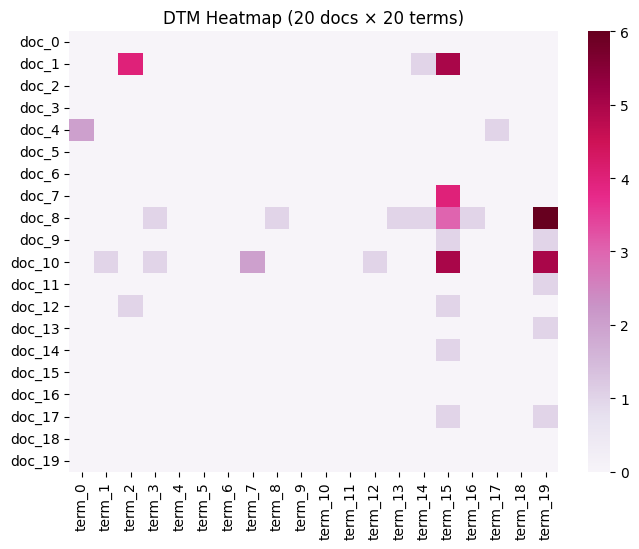

In [22]:
rows, cols = 20, 20
block = X_counts[0:rows, 0:cols].toarray()
df_block = pd.DataFrame(block,
                        index=[f"doc_{i}" for i in range(rows)],
                        columns=[f"term_{j}" for j in range(cols)])
plt.figure(figsize=(7.0,5.6))
sns.heatmap(df_block, cmap="PuRd", vmin=0, vmax=max(1, block.max()), cbar=True)
plt.title("DTM Heatmap (20 docs × 20 terms)")
plt.tight_layout(); plt.show()

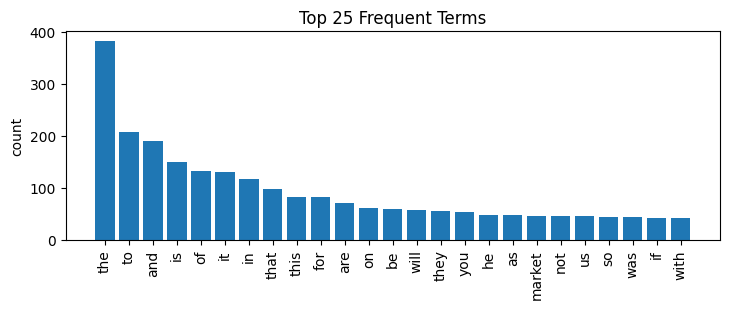

In [23]:
term_sum = np.asarray(X_counts.sum(axis=0)).ravel()
order = term_sum.argsort()[::-1]
k = 25
top_terms = vocab[order][:k]
top_counts = term_sum[order][:k]

plt.figure(figsize=(7.4,3.2))
plt.bar(top_terms, top_counts)
plt.title(f"Top {k} Frequent Terms")
plt.xticks(rotation=90)
plt.ylabel("count")
plt.tight_layout(); plt.show()

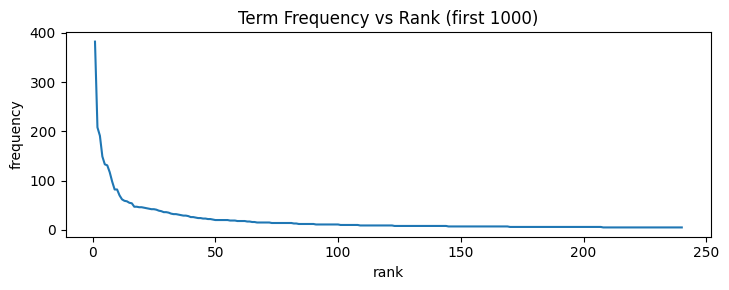

In [24]:
tf_sorted = term_sum[order]
x = np.arange(1, len(tf_sorted)+1)

plt.figure(figsize=(7.4,3.0))
plt.plot(x[:1000], tf_sorted[:1000])
plt.title("Term Frequency vs Rank (first 1000)")
plt.xlabel("rank")
plt.ylabel("frequency")
plt.tight_layout(); plt.show()

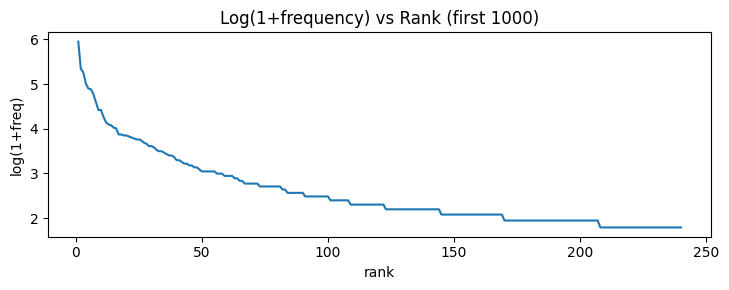

In [25]:
tf_log = np.log1p(tf_sorted)
plt.figure(figsize=(7.4,3.0))
plt.plot(x[:1000], tf_log[:1000])
plt.title("Log(1+frequency) vs Rank (first 1000)")
plt.xlabel("rank")
plt.ylabel("log(1+freq)")
plt.tight_layout(); plt.show()

# Phase 2

In [ ]:
### Begin Assignment Here